In [1]:
import sys
import warnings
warnings.filterwarnings(action='ignore')
import collections
from IPython.display import display
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

mpl.rcParams['axes.unicode_minus'] = False
font_fname = '/Users/seongdae/Library/Fonts/NanumGothicLight.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)
# size, family
print ('font size : '+str(plt.rcParams['font.size']) )
print ('font family : '+str(plt.rcParams['font.family']) )
# import default setting
print('python version : {0}\npandas version : {1}\nmatplotlib version : {2}\nnumpy version : {3}\n'
.format(sys.version, pd.__version__, mpl.__version__, np.__version__))

font size : 10.0
font family : ['NanumGothic']
python version : 3.7.6 (v3.7.6:43364a7ae0, Dec 18 2019, 14:18:50) 
[Clang 6.0 (clang-600.0.57)]
pandas version : 0.25.3
matplotlib version : 3.1.2
numpy version : 1.18.1



In [2]:
import sklearn.linear_model as sk_ln

In [3]:
# 선형모델(Linear_model)
# 선형모델은 입력 특성에 따른 선형 함수를 만들어 예측을 수행함

# 회귀의 선형 모델

In [4]:
# 예측함수는 학습할 각각의 data feature(특성)에 따라, 모델 예측값 = w[0]*x[0] + w[1]*x[1] --- w[n]*x[n] + b
    # w = 가중치, b = 절편.. 모델의 학습할 파라미터
    # 모델이 학습하지 않는 hyperparameter는 사람이 직접 설정하며,파이썬 클래스 나 함수의 인수에 포함됨 == 매개변수
    # 특성이 많아지면, 가중치는 각 특성에 해당하는 기울기를 모두 가지게됨
    # 즉, 모델의 예측값은 입력 특성에 w의 각 가중치(음수가능)를 곱해서 더한 가중치의 합으로 볼 수 있음

w[0]: 0.393906  b: -0.031804


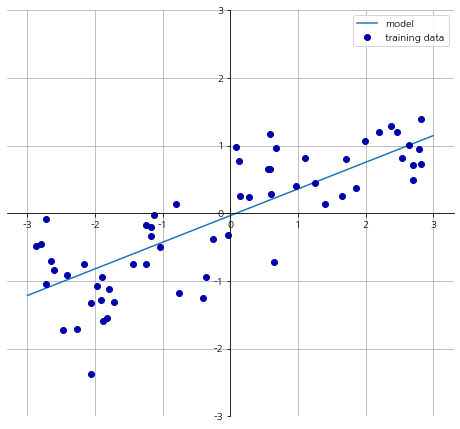

In [5]:
mglearn.plots.plot_linear_regression_wave()
# 1차원 wave dataset
# 파라미터 w[0]과 b를 직선처럼 되도록 학습시킴

In [6]:
# 회귀를 위한 선형 모델은 특성의 갯수에 따라서 하나일 땐 직선, 두개일 땐 평면
# 그 이상일 땐(더 높은 차원:특성이 더 많은 3++) 초평면(hyperplane)이 되는 회귀 모델의 특징을 가지고 있음

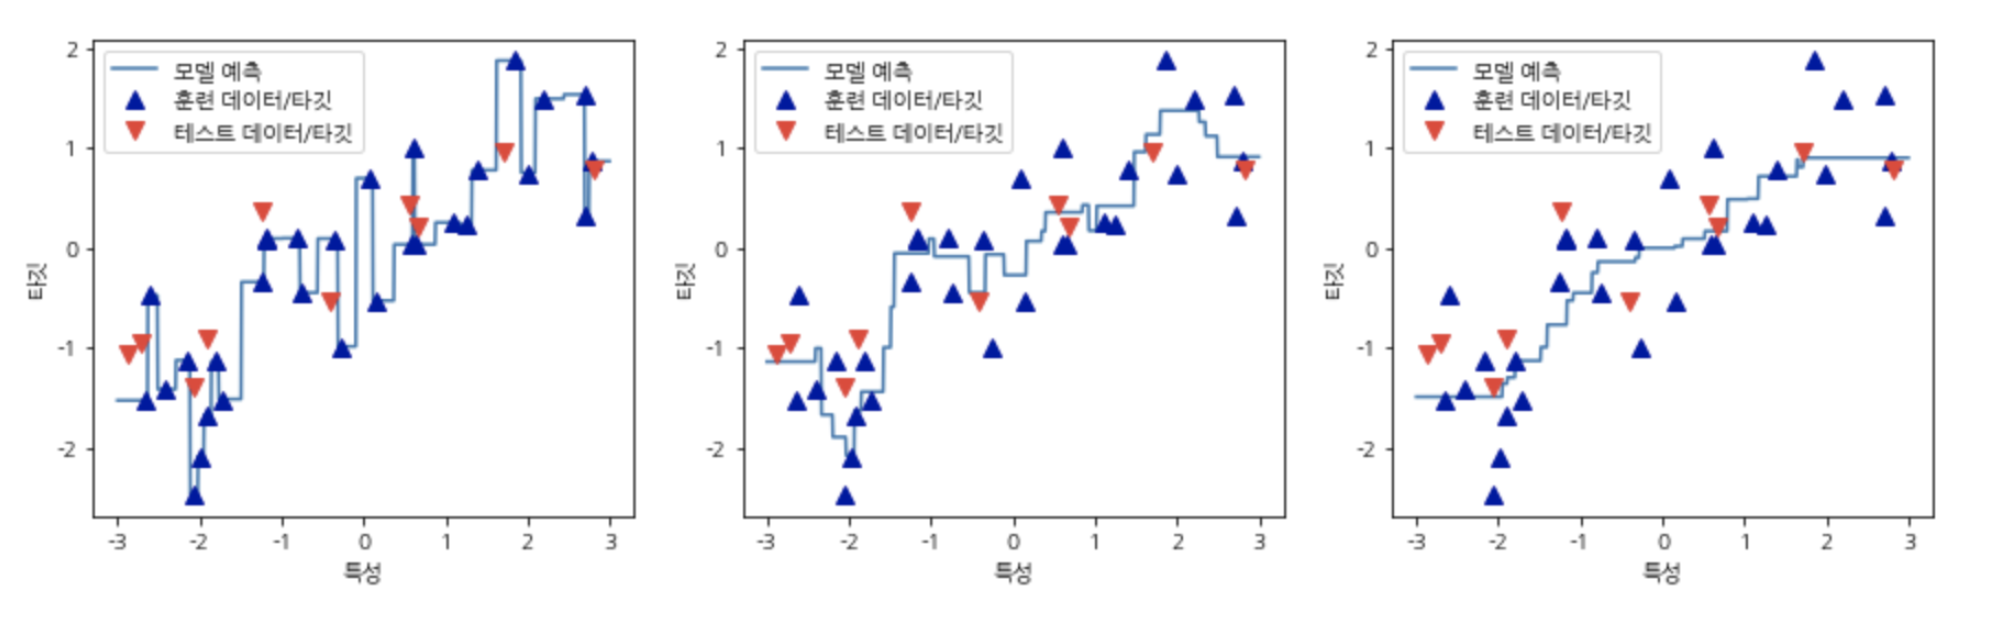

In [7]:
Image("./img/KNeighborsRegressor_compare.png")

In [8]:
# KNeighborsRegressor를 사용한 선과 비교해보면, 직선을 사용한 사용한 예측이 더 제약이 많아보임
# 즉, 데이터의 상세 정보를 모두 잃어버린 것 처럼 보임
# 어느정도 맞는말, 하지만 특성이 많은 데이터 셋에서 선형 모델은 훌륭한 성능을 낼 것임
# 특히, 훈련 데이터보다 특성이 더 많은 경우, 어떤 타깃 y도 훈련세트에 대해서 선형 함수로 모델링 할 수 있음_선형대수참조(지속적 공부 필요)
    # 선형 대수에서 방정식(훈련 데이터)보다 미지수(모델 파라미터)가 많은 경우를 불충분한 시스템(underdetermined system)이라함
    # 일반적으로 해당 경우 무수히 많은 해가 존재함

# 선형 회귀(최소제곱법)

In [9]:
# 선형 회귀 (linner regression), 최소 제곱법(OLS, ordinary least squares)
# 가장 간단하고, 오래된 회귀용 선형 모델
# 예측과 훈련세트 에 있는 타깃y(목적값) 사이의 평균제곱오차(mean squared error)를 최소화 하는 파라미터 w와 b를 찾음
# 평균제곱오차 계산식, 오차^2를 Sigma(합) 한 후, 나누어 평균을 구함
# 예측값과 타깃값의 차이를 제곱하여 더한 후, 샘플의 개수로 나눔, ( MSE = 1/n * sigma[1~n](예측값-타깃값)^2 )
# 선형 회귀는 매개변수가 없는 간단한 점이 장점이지만, 그래서 모델의 복잡도를 제어할 방법도 없듬

In [10]:
X, y = mglearn.datasets.make_wave(n_samples=60) # wave dataset 사용
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = sk_ln.LinearRegression().fit(X_train, y_train)

In [11]:
print('lr.coef_ : {0}\nlr.intercept_ : {1}'.format(lr.coef_, lr.intercept_))

# 기울기 파라미터는 가중치(weight) 또는 계수(coefficlent)라고 함
# LinearRegression 객체의 coef_ 속성에 저장
# 편향(offset) 또는 절편(intercept) 파라미터(b) 는 intercept_ 속성에 저장
    # coef_ intercept_ 와 같이 속성의 이름 뒤에 '_'를 붙이는 경우
    # scikit-learn 에서 훈련데이터에서 유도된 속성을 의미함, 사용자가 지정한 매개변수와 구분하기 위해서

lr.coef_ : [0.39390555]
lr.intercept_ : -0.031804343026759746


In [12]:
# intercept_ 속성은 항상 fload 값 하나(절편_offset) 이지만
# coef_ 속성은 각 입력 특성에 하나씩 대응되는 NumPy 배열임(현재는 wave dataset이므로 1개)

In [13]:
print('훈련 세트 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(X_test, y_test)))
# score는 .66으로 높지 않지만, 훈련 세트와 테스트의 점수가 비슷함
# 이는 과소 적합을 의미
# 1차원 데이터셋에선 모델이, 매우 단순(제한적)
# 그러나 고차원(특성이 많은) 데이터셋에선 모델의 성능이 매우 높아져, 과적합(Overfitting)될 가능성이 높음

훈련 세트 점수 : 0.67
테스트 세트 점수: 0.66


In [14]:
# LinearRegression 모델이 보스턴 주택가격 데이터 셋과 같은 복잡한 데이터 셋에서
# 어떻게 동작하는지 살펴봄, dataset (sample : 506, 특성 유도 : 104)
    # 104 : # 조합(이항계수)_중복을 포함한경우의
            # (13+12+11 ... +1 = 91) 91+13 < 중복을 포함해야 하므로

In [15]:
X, y = mglearn.datasets.load_extended_boston()
print('X shape : ', np.shape(X))
print('y shape : ', np.shape(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr_boston = sk_ln.LinearRegression().fit(X_train, y_train)

print('\n훈련 세트 점수 : {:.2f}'.format(lr_boston.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lr_boston.score(X_test, y_test)))

X shape :  (506, 104)
y shape :  (506,)

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


In [16]:
# 훈련 세트의 경우는 예측이 정확했지만, 테스트 세트에선 처참한 점수
# 과적합의 경우를 나타내는 확실한 지표

In [17]:
from sklearn.datasets import load_boston
boston = load_boston()
print('데이터의 형태',boston.data.shape)
# X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 62)
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)
lr_boston_not_combination = sk_ln.LinearRegression().fit(X_train, y_train)
print('\n훈련 세트 점수 : {:.2f}'.format(lr_boston_not_combination.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lr_boston_not_combination.score(X_test, y_test)))
# 특성의 연관성을 상승 시키지 않은 로우 데이터를 사용해보니 근소하게 높아지긴 하였다. 하지만 애초에 스코어가 낮다
# 적합하지 않은 모델, 그리고 모델의 복잡도를 제어할 수 있는 모델을 사용해야함

데이터의 형태 (506, 13)

훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.64


# Ridge Regression

In [18]:
# Ridge 도 회귀를 위한 선형 모델임
# 최소적합법에서 사용한 것과 같은 예측함수 사용
# 리지 회귀에서는 w(가중치) 선택을 훈련 데이터를 잘 예측할 뿐이 아니라
# 추가 제약 조건(L2 규제 .. ) 을 만족 시키기 위한 목적도 있음
# w(가중치)의 절대값을 가능한 한 적게 만드는 것
    # w의 모든 원소가 0에 가깝게 되길 원함 == 모든 특성이 출력에 주는 영향을 최소한으로 만듬(기울기를작게)
    # 이러한 제약을 규제(regulrization)이라 함, 과대적합이 되지 않도록 모델을 강제로 제한하는 의미
# L2 규제, L1 규제
    # a∑(j=1,n) w(j번째값)^2 
    # L1의 경우에는 가중치의 크기에 상관없이 상수값을 뺌, 이는 대체적으로 불필요한 가중치의 수치를 0으로 만들도록 하는 방향으로 적용됨
    # 즉, 중요한 가중치만을 취하기 때문에 sparse feature에 대한 모델을 구성하는데 적합
    # L2의 경우에는 가중치의 값을 이용, 어느 정도 튀는 값에 대해 대응할 수 있다
    # 따라서, 이상치나 노이즈가 있는 데이터에 대한 학습을 진행할 때 사용시에 좋음, 특히 선형 모델의 일반화에 좋다고 한다

In [19]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'.format(ridge.score(X_train,y_train)))

훈련 세트 점수 : 0.77


In [20]:
# 𝜆 는 기존의 잔차 제곱합과 추가적 제약 조건의 비중을 조절하기 위한 하이퍼 모수(hyper parameter)
# 𝜆가 크면 정규화 정도가 커지고 가중치의 값들이 작아짐
# 𝜆가 작아지면 정규화 정도가 작아지며 𝜆 가 0이 되면 일반적인 선형 회귀모형이 됨

In [21]:
# Ridge 도 회귀를 위한 선형 모델임
# 최소적합법에서 사용한 것과 같은 예측함수 사용
# 리지 회귀에서는 w(가중치) 선택을 훈련 데이터를 잘 예측할 뿐이 아니라
# 추가 제약 조건(L2 규제 .. ) 을 만족 시키기 위한 목적도 있음
# w(가중치)의 절대값을 가능한 한 적게 만드는 것
    # w의 모든 원소가 0에 가깝게 되길 원함 == 모든 특성이 출력에 주는 영향을 최소한으로 만듬(기울기를작게)
    # 이러한 제약을 규제(regulrization)이라 함, 과대적합이 되지 않도록 모델을 강제로 제한하는 의미
# L2 규제, L1 규제
    # a∑(j=1,n) w(j번째값)^2 
    # L1의 경우에는 가중치의 크기에 상관없이 상수값을 뺌, 이는 대체적으로 불필요한 가중치의 수치를 0으로 만들도록 하는 방향으로 적용됨
    # 즉, 중요한 가중치만을 취하기 때문에 sparse feature에 대한 모델을 구성하는데 적합
    # L2의 경우에는 가중치의 값을 이용, 어느 정도 튀는 값에 대해 대응할 수 있다
    # 따라서, 이상치나 노이즈가 있는 데이터에 대한 학습을 진행할 때 사용시에 좋음, 특히 선형 모델의 일반화에 좋다고 한다

In [22]:
from sklearn.linear_model import Ridge
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
ridge = Ridge().fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'.format(ridge.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


In [23]:
# 𝜆 는 기존의 잔차 제곱합과 추가적 제약 조건의 비중을 조절하기 위한 하이퍼 모수(hyper parameter)
# 𝜆가 크면 정규화 정도가 커지고 가중치의 값들이 작아짐
# 𝜆가 작아지면 정규화 정도가 작아지며 𝜆 가 0이 되면 일반적인 선형 회귀모형이 됨
    # Default 값은 alpha = 1.0임

In [24]:
# 모델의 복잡도가 낮아지면, 훈련세트에서 성능은 나빠지지만 일반화된 모델이 된다 볼 수 있음
# alpha 값을 10.0으로 했을때?
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'.format(ridge10.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


In [25]:
# alpha 값이 0.1일때, 제약이 적을떄..
ridge01 = Ridge(alpha=0.01).fit(X_train,y_train)
print('훈련 세트 점수 : {:.2f}'.format(ridge01.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.94
테스트 세트 점수 : 0.70


In [26]:
# 선형 회귀이기 때문에 제약이 적은 상태에서 좋은 스코어를 냄
# alpha 값에 따라 coef_ 속성(w_기울기, w_가중치)이 어떻게 달라지는지..
# alpha 매개변수가 모델을 어떻게 변화시키는지..
    # x축, x0 = 1번째 특성 계수, x1 = 2번째 특성 계수 .... xn = n+1 번쨰
    # y축, 특성 계수의 값 (수치)

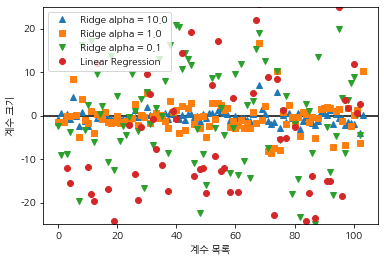

In [27]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha = 10.0')
plt.plot(ridge.coef_, 's', label='Ridge alpha = 1.0')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha = 0.1')

plt.plot(lr_boston.coef_, 'o', label='Linear Regression')
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

In [28]:
# 규제의 정도에 따라서 계수값들이 널뛰기를 하거나, 일정한 값으로 픽스되거나 하는 모습을 볼 수 있음
    # alpha 10 : 계수 -3 ~ 3 / alpha 0 : 계수 그림 밖으로 넘어갈 정도
# 규제의 효과를 이해하는 방법 2 : alpha 값을 고정하고, 훈련 데이터의 크기를 변화시켜 보는 것

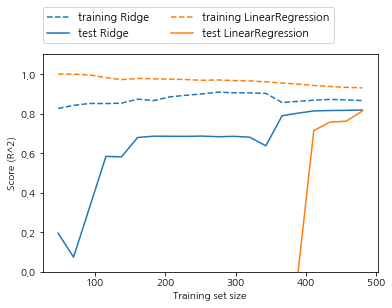

In [29]:
# 보스턴 데이터셋(조합된 104특성을 가진..) alpha 값 1.0 고정
# 훈련 데이터의 크기를 변화하면서 데이터 관찰
    # 데이터셋의 크기에 따르 모델의 성능 변화를 나타낸 그래프 == 학습곡선(learning curve)
mglearn.plots.plot_ridge_n_samples()

In [30]:
# 학습 곡선을 통한 정리
    # 모든 데이터셋에 대해 훈련 세트가 테스트 세트의 점수보다 높음(점선)
    # Ridge는 규제에 의해 전체적으로 훈련 세트에 대한 점수는 낮으나, 테스트 세트에 대해선 강하다
    # 데이터셋의 크기가 커질 수록 성능은 좋아지고, 마지막엔 선형회귀가 리지회귀를 따라잡음
    # 이 데이터에선, 데이터를 충분히 주면 규제항이 덜 중요해져서 결국 같아짐..(항상 그런건 아니다)
        # 또한 데이터셋이 커질수록 선형 회귀의 훈련 데이터 성능이 감소하는데
        # 이는 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 떄문임

# Lasso

In [31]:
# 선형 회귀에 규제를 적용하는데에 Ridge의 대안으로 Lasso도 존재
# Ridge와 같이 Lasso도 계수를 0에 가깝게 하려고 함
# 그러나 Lasso는 L1 규제를 사용
    # L2, L1 규제 차이는 Ridge Regression 참조
    # 간단히 L1 규제를 사용하면, 어떤 계수는 정말 0이 됨
        # L1 노름 == 계수의 절대값들의 합 을 패널티로 사용
        # 모델에서 완전히 제외되는 특성이 생김 == 특성 선택이(feature selection)이 자동으로 이루어짐
        # 모델을 이해하기 쉬워지고 이 모델에서 가장 중요한 특성이 뭔지 드러내줌

In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'.format(lasso.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso.score(X_test, y_test)))
print('사용 특성 개수 : ', np.sum(lasso.coef_ !=0))
print('비사용 특성 개수 : ', np.sum(lasso.coef_ == 0))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용 특성 개수 :  4
비사용 특성 개수 :  100


In [38]:
# 점수는 처참한 수준(과소적합)
# 특성 104개 중에 4개만을 사용 == 중요한 특성이 4개
    # alpha Default 1.0 이며 조절하면 과소적합을 조절할 수 있음, max_iter(반복실행 최대횟수)의 기본값을 늘림 -> alpha(규제) 감소
    # Lasso는 L1,L2 규제를 함께쓰는 엘라스틱넷(Elastic-Net) 방식에서 L2규제가 빠진 것
    # Lasso의 alpha 매개변수는 R언어의 엘라스틱넷 패키지의 glmnet의 lambda 매개변수와 같은 의미
    # 이들은 한 특성씩 좌표축을 따라 최적화하는 좌표 하강법(coordinate descent) 방식을 사용
    # 학습을 반복진행하며, 최적의 값을 찾아가게됨, 여기서 alpha 값을 줄이면
    # 오차값을 찾아가는 반복횟수가 늘어남 == Lasso 객체 n_iter 속성에 저장확인 가능

In [46]:
# lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
# alpha값이 줄어듬에 따른, 반복회수 증가 필요(max_iter)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'.format(lasso001.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso001.score(X_test, y_test)))
print('사용 특성 개수 : ', np.sum(lasso001.coef_ !=0))
print('비사용 특성 개수 : ', np.sum(lasso001.coef_ == 0))

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용 특성 개수 :  33
비사용 특성 개수 :  71


In [47]:
# alpha 값을 낮추면 모데르이 복잡도는 증가 -> 훈련, 테스트 성능 증가
# 특성 개수도 33개 사용하여 조금 더 명확한 모델이 되었음을 확인
# 그러나 alpha 값을 너무 낮추면 규제의 효과가 없어짐 -> 과대적합 .. LinearRegression의 결과와 비슷해짐
lasso00001 = Lasso(alpha=0.0001, max_iter=1000000).fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('사용 특성 개수 : ', np.sum(lasso00001.coef_ !=0))
print('비사용 특성 개수 : ', np.sum(lasso00001.coef_ == 0))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용 특성 개수 :  96
비사용 특성 개수 :  8


Text(0, 0.5, '계수 크기')

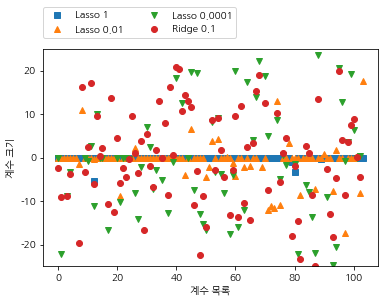

In [52]:
# alpha 값이 다른 모델들의 계쑤를 그래프..
plt.plot(lasso.coef_, 's', label='Lasso 1')
plt.plot(lasso001.coef_, '^', label='Lasso 0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso 0.0001')
plt.plot(ridge01.coef_, 'o', label='Ridge 0.1')
plt.legend(ncol = 2, loc = (0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')

In [53]:
# Lasso의 alpha 1 일떄, 거의 모든 계수가 0일 뿐만 아니라, 크기도 작음 -> 과소적합원인
# Lasso의 alpha 0.01 일때, 과반수의 계수가 0인 분포를 얻음
# Lasso의 alpha 0.0001일때, 계수의 값이 대부분 0이 아니고, 값도 너무 자유로움 -> 과대적합
# Lasso 0.01, Ridge 0.1 의 경우 성능이 비슷하지만, Ridge를 사용하면 어떤 계수도 0이 되지 않음(모든 특성 포함)

In [ ]:
# 보통의 경우 Ridge 회귀를 선호하나, 특성이 많고 그중 일부만 취하고 싶은 경우 Lasso가 더 좋은 선택 일 수 있음
# 사이킷런에서 엘라스틱넷(ElasticNet)도 제공
    # 성능은 좋지만, L1규제와 L2규제를 위한 매개변수 두개를 조정해야함